# **Simulation Open Loop**


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from package_DBR import FOPDT, SOPDT, SelectPath_RT, Process, Bode

## **Load Data From Experiment**

### MV

In [17]:
nameFile = 'Cleaned_data_Open_loop_experiment_on_MV_2024-03-18-16h11.txt'

titleName = nameFile.split('.')[0]    
data = pd.read_csv('Data/' + nameFile)

if 'MV' in nameFile:
    ExpVariable = 'MV'
    tm = data['tm'].values
    MVm = data['MVm'].values
    PVm = data['PVm'].values    
else:    
    ExpVariable = 'DV'
    tm = data['tm'].values
    DVm = data['DVm'].values 
    PVm = data['PVm'].values
     
print(ExpVariable)    

MV


### DV

In [18]:
nameFile = 'Cleaned_data_Open_loop_experiment_on_DV_2024-03-18-20h01.txt'

titleName = nameFile.split('.')[0]    
data = pd.read_csv('Data/' + nameFile)

if 'MV' in nameFile:
    ExpVariable = 'MV'
    tm = data['tm'].values
    MVm = data['MVm'].values
    PVm = data['PVm'].values    
else:    
    ExpVariable = 'DV'
    tm_DV = data['tm'].values
    DVm = data['DVm'].values 
    PVm_DV = data['PVm'].values
     
print(ExpVariable)    

DV


## **Optimal Parameters** 

In [19]:
Ts = 1

### MV

In [20]:
Kp_OMV_FOPDT = 0.3135026933058151
T_OMV_FOPDT = 206.26385028706403
theta_OMV_FOPDT = 12.99999828747534

Kp_OMV_SOPDT = 0.30788564834253684
T1_OMV_SOPDT = 183.81942938046797
T2_OMV_SOPDT = 3.2920224028341535e-12
theta_OMV_SOPDT = 20.015407110302775

#Process values
PV_OMV_FOPDT = FOPDT(MVm, Kp_OMV_FOPDT, T_OMV_FOPDT, theta_OMV_FOPDT, Ts)
PV_OMV_SOPDT = SOPDT(MVm, Kp_OMV_SOPDT, T1_OMV_SOPDT, T2_OMV_SOPDT, theta_OMV_SOPDT, Ts)

### DV 

In [21]:
Kp_ODV_FOPDT = 0.2956813918550742
T_ODV_FOPDT = 184.8798163491467
theta_ODV_FOPDT = 40.1363006210116

Kp_ODV_SOPDT = 0.2951290424136788
T1_ODV_SOPDT = 182.2549613489765
T2_ODV_SOPDT = 13.184430234847984
theta_ODV_SOPDT = 28.999891911961512

#Process values
PV_ODV_FOPDT = FOPDT(DVm, Kp_ODV_FOPDT, T_ODV_FOPDT, theta_ODV_FOPDT, Ts)
PV_ODV_SOPDT = SOPDT(DVm, Kp_ODV_SOPDT, T1_ODV_SOPDT, T2_ODV_SOPDT, theta_ODV_SOPDT, Ts)

## **Graphic's Parameters - MV**

In [22]:
t1 = 67
t2 = 106
Tu = 13.4
Tg = 204.6
a = 0.12

## Temporary
Kp = 0.31

### Broida 1

In [23]:
T_B1 = Tg 
theta_B1 = Tu

print(f'Broida 1 : T = {T_B1}, theta = {theta_B1}')

#Process values
PV_B1 = FOPDT(MVm, Kp, T_B1, theta_B1, Ts) 

Broida 1 : T = 204.6, theta = 13.4


### Broida 2

In [24]:
T_B2 = 5.5*(t2-t1)
theta_B2 = 2.8*t1 - 1.8*t2

print(f'Broida 2 : T = {T_B2}, theta = {theta_B2}')

#Process values
#PV_B2 = FOPDT(MVm, Kp, T_B2, theta_B2, Ts)

Broida 2 : T = 214.5, theta = -3.200000000000017


### van der Grinten

In [25]:
T1_G = Tg * (3 * a * np.exp(1) - 1)/(1 + a * np.exp(1))
T2_G = Tg*(1-a*np.exp(1))/(1+a*np.exp(1))
theta_G = Tu - (T1_G*T2_G)/(T1_G + 3*T2_G)

print(f'van der Grinten : T1 = {T1_G}, T2 = {T2_G}, theta = {theta_G}')

#Process values
PV_G = SOPDT(MVm, Kp, T1_G, T2_G, theta_G, Ts) 

van der Grinten : T1 = -3.3043689232041142, T2 = 103.95218446160206, theta = 14.513252101693826


### Strejc

In [26]:
ratio = Tu/Tg

#Computation of Strejc model parameters
table_a = {1 : 0, 2 : 0.1, 3 : 0.22, 4 : 0.32, 5 : 0.41, 6 : 0.49, 7 : 0.57}
table_b = {1 : 1, 2 : 2.72, 3 : 3.69, 4 : 4.46, 5 : 5.12, 6 : 5.7, 7 : 6.23} 

#Order
n = 0

for key, value in table_a.items() : 
    if value <= ratio and ratio < table_a[key+1] :
        n = key

a_n = table_a[n]
b_n = table_b[n]

T_S = Tg/b_n
Tuth= a_n*Tg
theta_S = Tu - Tuth

print(f'Strejc : order = {n}, T = {T_S}, theta = {theta_S}')

#Process values
PV_S = FOPDT(MVm, Kp, T_S, theta_S, Ts) 

Strejc : order = 1, T = 204.6, theta = 13.4


## **Step Responses**

### Manipulated Value

(0.0, 990.0)

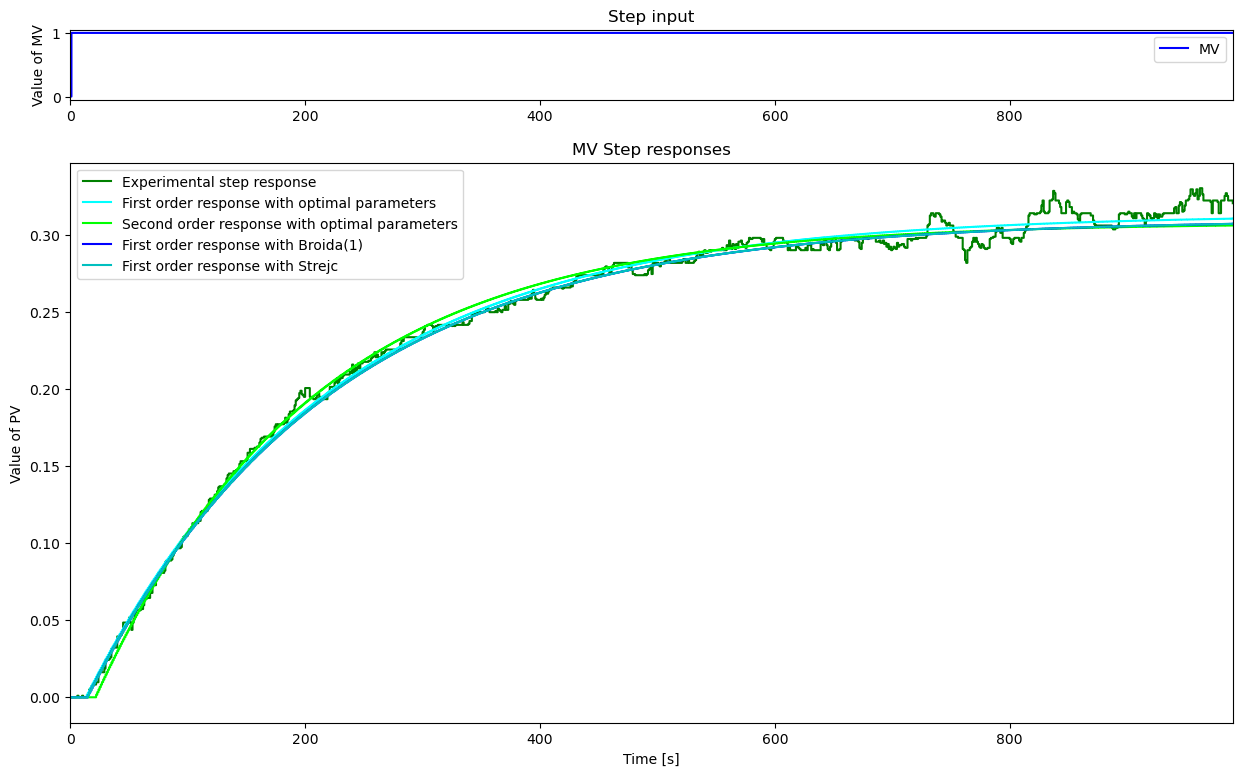

In [27]:
fig, axs = plt.subplots(2, 1, figsize=(15, 9), gridspec_kw={'height_ratios': [1, 8]})

axs[0].step(tm, MVm, 'b-', label='MV', where='post')
axs[0].set_ylabel('Value of MV')
axs[0].set_title('Step input')
axs[0].legend(loc='best')
axs[0].set_xlim([0, np.max(tm)])

axs[1].step(tm, PVm, 'g-', label='Experimental step response', where='post')
axs[1].step(tm, PV_OMV_FOPDT, 'cyan', label='First order response with optimal parameters', where='post')
axs[1].step(tm, PV_OMV_SOPDT, 'lime', label='Second order response with optimal parameters', where='post')
axs[1].step(tm, PV_B1, 'b-', label='First order response with Broida(1)', where='post')
#axs[1].step(tm, PV_B2, 'k-', label='First order response with Broida(2)', where='post')
#axs[1].step(tm, PV_G, 'r-', label='Second order response with van der Grinten', where='post')
axs[1].step(tm, PV_S, 'c-', label='First order response with Strejc', where='post')
axs[1].set_ylabel('Value of PV')
axs[1].set_xlabel('Time [s]')
axs[1].set_title('MV Step responses')
axs[1].legend(loc='best')
axs[1].set_xlim([0, np.max(tm)])

### Disturbance Value

(0.0, 820.0)

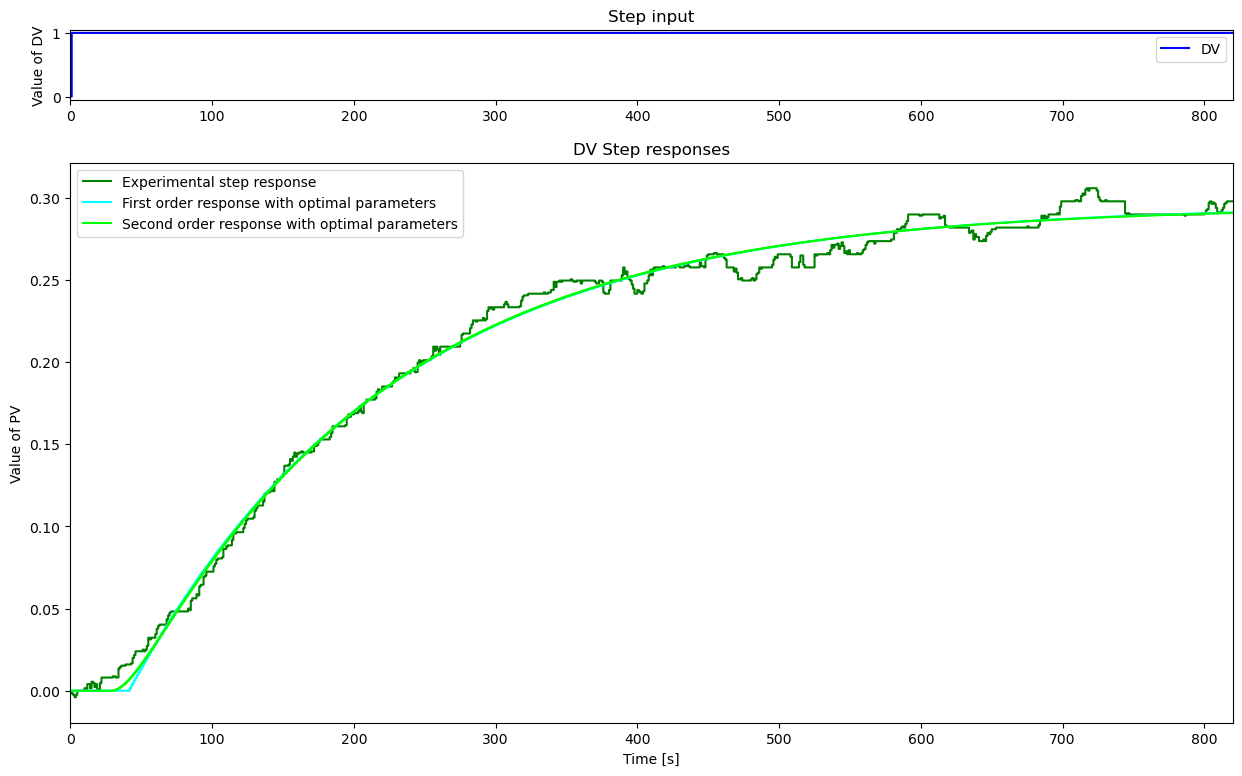

In [28]:
fig, axs = plt.subplots(2, 1, figsize=(15, 9), gridspec_kw={'height_ratios': [1, 8]})

axs[0].step(tm_DV, DVm, 'b-', label='DV', where='post')
axs[0].set_ylabel('Value of DV')
axs[0].set_title('Step input')
axs[0].legend(loc='best')
axs[0].set_xlim([0, np.max(tm_DV)])

axs[1].step(tm_DV, PVm_DV, 'g-', label='Experimental step response', where='post')
axs[1].step(tm_DV, PV_ODV_FOPDT, 'cyan', label='First order response with optimal parameters', where='post')
axs[1].step(tm_DV, PV_ODV_SOPDT, 'lime', label='Second order response with optimal parameters', where='post')
axs[1].set_ylabel('Value of PV')
axs[1].set_xlabel('Time [s]')
axs[1].set_title('DV Step responses')
axs[1].legend(loc='best')
axs[1].set_xlim([0, np.max(tm_DV)])

## **Bode graphs**

### Manipulated Value

Text(0, 0.5, 'Phase [°]')

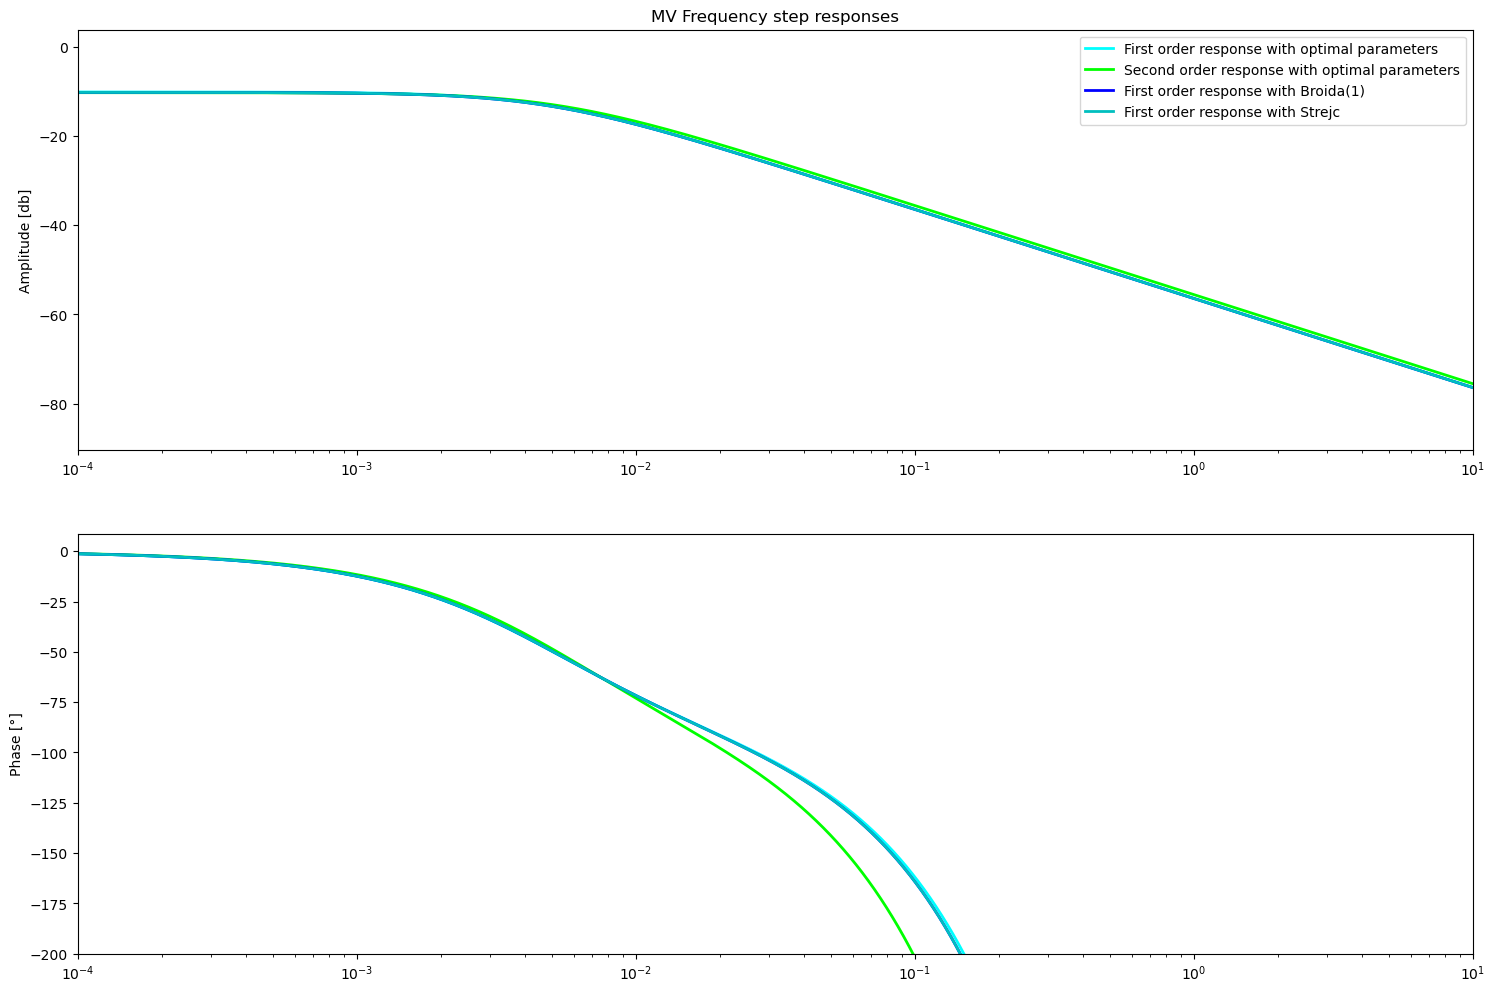

In [29]:
P_OMV_FOPDT = Process({'Kp' : Kp_OMV_FOPDT, 'theta' : theta_OMV_FOPDT, 'Tlag1' : T_OMV_FOPDT})
P_OMV_SOPDT = Process({'Kp' : Kp_OMV_SOPDT, 'theta' : theta_OMV_SOPDT, 'Tlag1' : T1_OMV_SOPDT, 'Tlag2' : T2_OMV_SOPDT})
P_B1 = Process({'Kp' : Kp, 'theta' : theta_B1, 'Tlag1' : T_B1})
P_S = Process({'Kp' : Kp, 'theta' : theta_S, 'Tlag1' : T_S})

omega = np.logspace(-4, 1, 10000)
Ps_OMV_FOPDT = Bode(P_OMV_FOPDT, omega, False) # Optimal Broida
Ps_OMV_SOPDT = Bode(P_OMV_SOPDT, omega, False) # Optimal van der Grinten
Ps_B1 = Bode(P_B1, omega, False) # Broida (1)
Ps_S = Bode(P_S, omega, False) # Strejc

plt.figure(figsize = (18,12))

# Gain  plot
plt.subplot(2,1,1)
gain_min = np.min(20*np.log10(np.abs(Ps_OMV_FOPDT)/5))
gain_max = np.max(20*np.log10(np.abs(Ps_OMV_FOPDT)*5))
plt.semilogx(omega,20*np.log10(np.abs(Ps_OMV_FOPDT)),'cyan',linewidth=2,label='First order response with optimal parameters')
plt.semilogx(omega,20*np.log10(np.abs(Ps_OMV_SOPDT)),'lime',linewidth=2,label='Second order response with optimal parameters')
plt.semilogx(omega,20*np.log10(np.abs(Ps_B1)),'b-',linewidth=2,label='First order response with Broida(1)')
plt.semilogx(omega,20*np.log10(np.abs(Ps_S)),'c-',linewidth=2,label='First order response with Strejc')
plt.xlim([np.min(omega), np.max(omega)])
plt.ylim([gain_min, gain_max])
plt.ylabel('Amplitude [db]')
plt.title('MV Frequency step responses')
plt.legend(loc='best')

# Phase plot
plt.subplot(2,1,2)
ph_min = np.min((180/np.pi)*np.unwrap(np.angle(Ps_OMV_FOPDT))) - 10
ph_max = np.max((180/np.pi)*np.unwrap(np.angle(Ps_OMV_FOPDT))) + 10
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_OMV_FOPDT)),'cyan',linewidth=2)
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_OMV_SOPDT)),'lime',linewidth=2)
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_B1)),'b-',linewidth=2)
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_S)),'c-',linewidth=2)
plt.xlim([np.min(omega), np.max(omega)])
plt.ylim([np.max([ph_min, -200]), ph_max])
plt.ylabel('Phase [°]')

### Disturbance Value

Text(0, 0.5, 'Phase [°]')

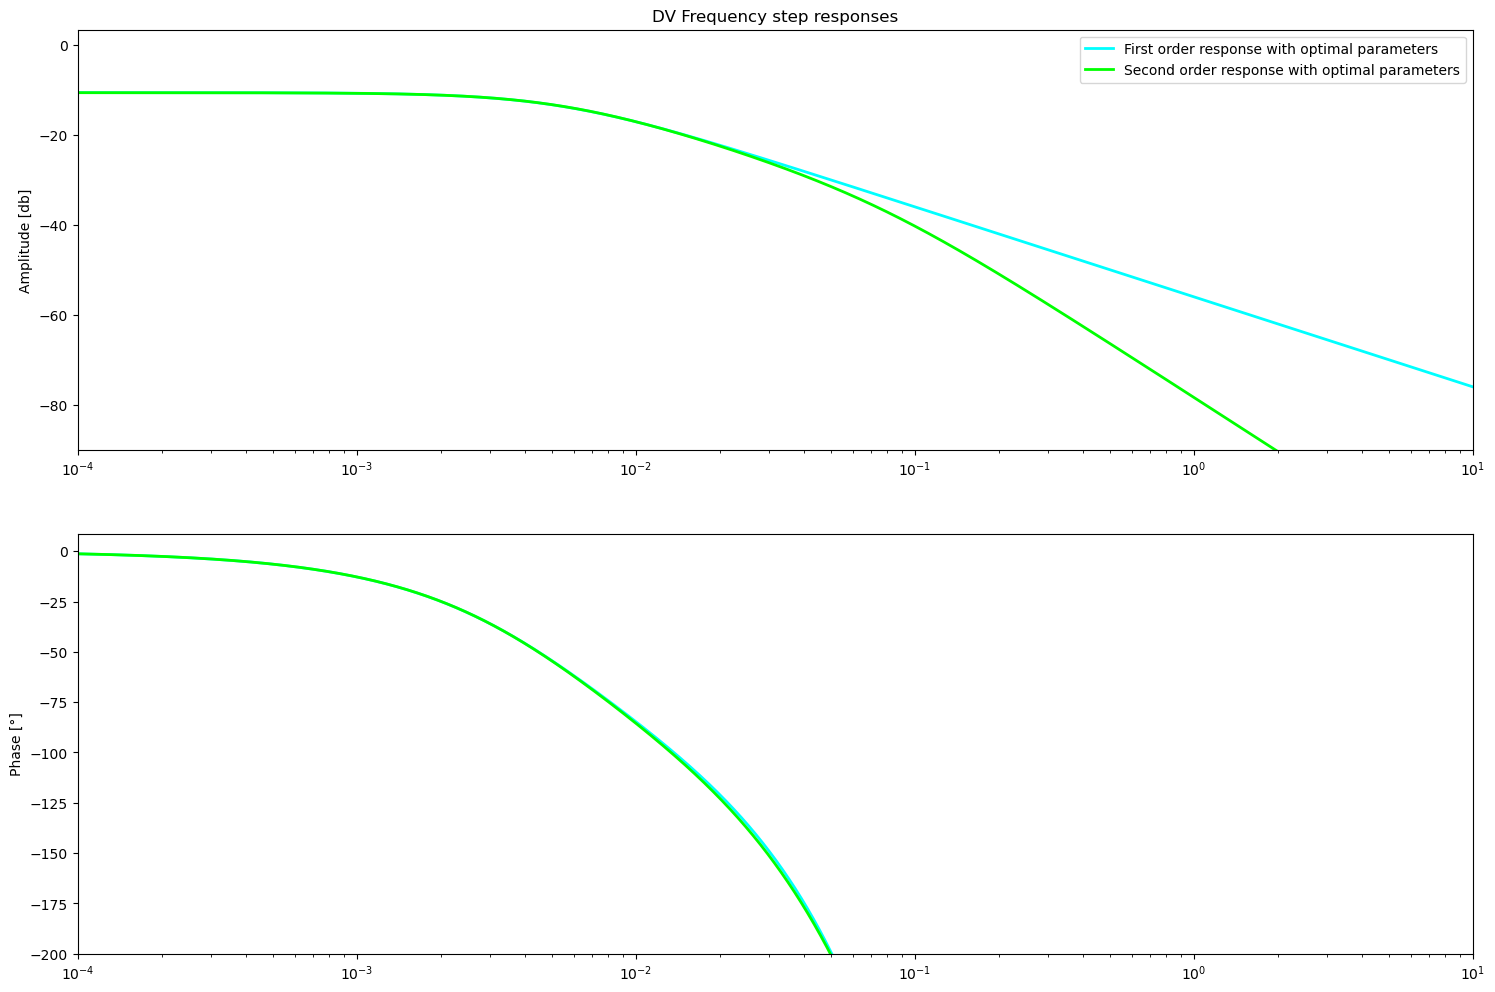

In [30]:
P_ODV_FOPDT = Process({'Kp' : Kp_ODV_FOPDT, 'theta' : theta_ODV_FOPDT, 'Tlag1' : T_ODV_FOPDT})
P_ODV_SOPDT = Process({'Kp' : Kp_ODV_SOPDT, 'theta' : theta_ODV_SOPDT, 'Tlag1' : T1_ODV_SOPDT, 'Tlag2' : T2_ODV_SOPDT})

omega = np.logspace(-4, 1, 10000)
Ps_ODV_FOPDT = Bode(P_ODV_FOPDT, omega, False) # Optimal Broida
Ps_ODV_SOPDT = Bode(P_ODV_SOPDT, omega, False) # Optimal van der Grinten

plt.figure(figsize = (18,12))

# Gain plot
plt.subplot(2,1,1)
gain_min = np.min(20*np.log10(np.abs(Ps_ODV_FOPDT)/5))
gain_max = np.max(20*np.log10(np.abs(Ps_ODV_FOPDT)*5))
plt.semilogx(omega,20*np.log10(np.abs(Ps_ODV_FOPDT)),'cyan',linewidth=2,label='First order response with optimal parameters')
plt.semilogx(omega,20*np.log10(np.abs(Ps_ODV_SOPDT)),'lime',linewidth=2,label='Second order response with optimal parameters')
plt.xlim([np.min(omega), np.max(omega)])
plt.ylim([gain_min, gain_max])
plt.ylabel('Amplitude [db]')
plt.title('DV Frequency step responses')
plt.legend(loc='best')

# Phase plot
plt.subplot(2,1,2)
ph_min = np.min((180/np.pi)*np.unwrap(np.angle(Ps_ODV_FOPDT))) - 10
ph_max = np.max((180/np.pi)*np.unwrap(np.angle(Ps_ODV_FOPDT))) + 10
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_ODV_FOPDT)),'cyan',linewidth=2)
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_ODV_SOPDT)),'lime',linewidth=2)
plt.xlim([np.min(omega), np.max(omega)])
plt.ylim([np.max([ph_min, -200]), ph_max])
plt.ylabel('Phase [°]')